###Objective

The purpose of this assignment is to simulate and analyze a dataset of potential leads for e-learning programs. This dataset will include information on lead demographics, program interest, and lead source. Analysis will be conducted to give insight into lead trends, the popularity of programs, and actionable marketing strategies.

###1. Data Generation

  - Generate a dataset of 10,000+ rows based on the above structure.

  - Include a variety of locations, colleges, years of study, program interests, and lead
sources.


Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Numbers of rows
nRows = 10000

#Data of each column
locations = ['Ahmedabad', 'Gandhinagar', 'Baroda', 'Surat', 'Pune', 'Mumbai', 'Chennai']
colleges = ['ABC University', 'DEF Institute', 'GHI College', 'PQR University', 'LMN University', 'JKL Institute', 'XYZ University']
year_of_study = ['1st', '2nd', '3rd', '4th']
program_interests = ['Data Science', 'Robotics', 'AI', 'App Deveoper', 'Electric Vehicle', 'Web Developer', 'Game Developer']
lead_source = ['Instrageam', 'LinkedIn', 'Collaboration', 'Google Form', 'Mss-Malling', 'Whatsapp']

#Generate synthetic dataset
df = pd.DataFrame({
    'Lead ID': [f"LD{i}" for i in range(1, nRows + 1)],
    'Location': np.random.choice(locations, nRows),
    'College': np.random.choice(colleges, nRows),
    'Year of Study': np.random.choice(year_of_study, nRows),
    'Program Interest': np.random.choice(program_interests, nRows),
    'Lead Source': np.random.choice(lead_source, nRows)
})

#Save data intio csv file
df.to_csv('e-learning programs.csv', index=False)

print("Dataset created and saved as 'e-learning programs.csv'.")

Dataset created and saved as 'e-learning programs.csv'.


In [ ]:
df.sample(5)

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
2333,LD2334,Surat,DEF Institute,2nd,Data Science,Collaboration
910,LD911,Mumbai,JKL Institute,2nd,Web Developer,Whatsapp
1604,LD1605,Pune,DEF Institute,2nd,Data Science,Instrageam
4753,LD4754,Mumbai,DEF Institute,2nd,AI,Google Form
7187,LD7188,Pune,DEF Institute,2nd,App Deveoper,Mss-Malling


###Column Summary

`Lead ID:` A unique identifier for each lead. ( LD1, LD2,L D3, LD4 etc.)

`Location:` The city or region the lead belongs to (e.g., Ahmedabad, Surat, Mumbai etc.).

`College:` Name of the college/university (e.g., XYZ University, ABC Institute etc.).

`Year of Study:` Current year of study (e.g., 1st,2nd,3rd,4th).

`Program Interest:` The e-learning program the lead is interested in (e.g., Data
Science,Robotics,Ai,Electric Vehicle).

`Lead Source:` Source through which the lead was acquired (e.g., Instagram, LinkedIn,College
Collaboration,Google Form, Mass-Mailing,Whatsapp).

###2. Demographic Analysis

  -  Analyze the data to identify trends in lead sourcing based on location,college, and year of study.

  - Highlight any significant patterns or anomalies.



In [ ]:
location_counts = df['Location'].value_counts()
college_counts = df['College'].value_counts()
year_of_study_counts = df['Year of Study'].value_counts()

print(location_counts)
print(college_counts)
print(year_of_study_counts)

Location
Gandhinagar    1498
Baroda         1454
Surat          1429
Chennai        1419
Mumbai         1413
Pune           1404
Ahmedabad      1383
Name: count, dtype: int64
College
JKL Institute     1470
ABC University    1447
LMN University    1442
DEF Institute     1441
PQR University    1419
XYZ University    1409
GHI College       1372
Name: count, dtype: int64
Year of Study
1st    2522
4th    2519
3rd    2502
2nd    2457
Name: count, dtype: int64


Lead Distribution by Location

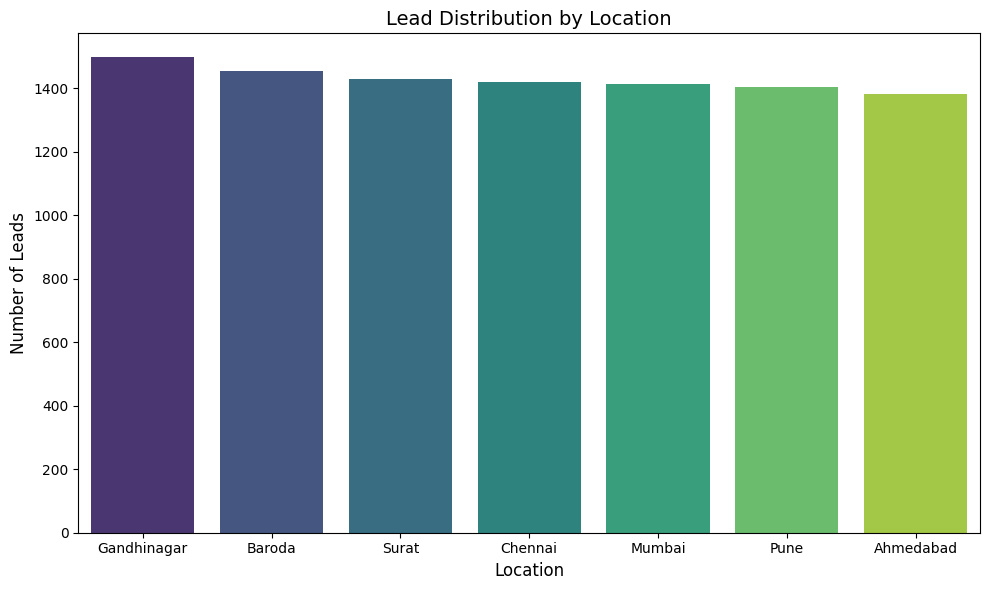

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, hue=location_counts.index, palette="viridis", legend=False)
plt.title("Lead Distribution by Location", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Leads", fontsize=12)
plt.tight_layout()
plt.show()

Lead Distribution by College

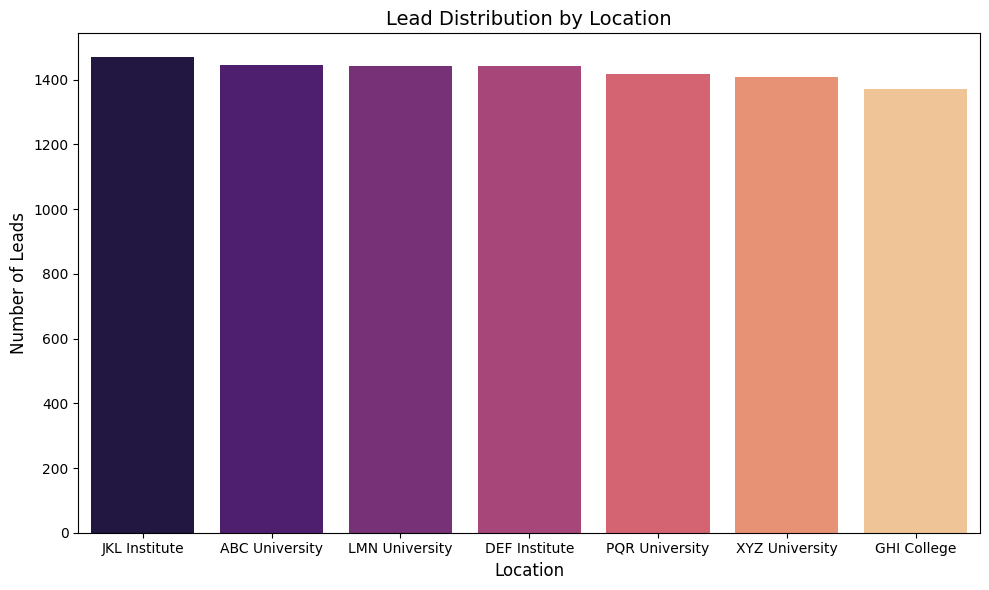

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=college_counts.index, y=college_counts.values, hue=college_counts.index, palette="magma", legend=False)
plt.title("Lead Distribution by Location", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Leads", fontsize=12)
plt.tight_layout()
plt.show()

Lead Distribution by Year of Study

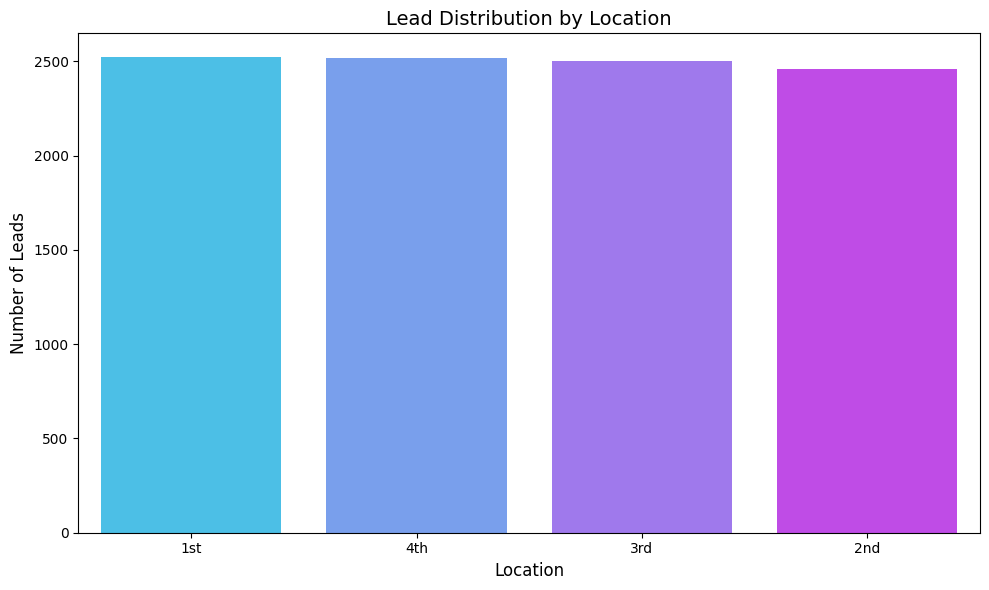

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=year_of_study_counts.index, y=year_of_study_counts.values,hue=year_of_study_counts.index, palette="cool", legend=False)
plt.title("Lead Distribution by Location", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Leads", fontsize=12)
plt.tight_layout()
plt.show()

###3. Program Analysis

  - Compare the interest levels for various e-learning programs.
  -  Provide a recommendation on which demographics should be targeted more
aggressively for each program.


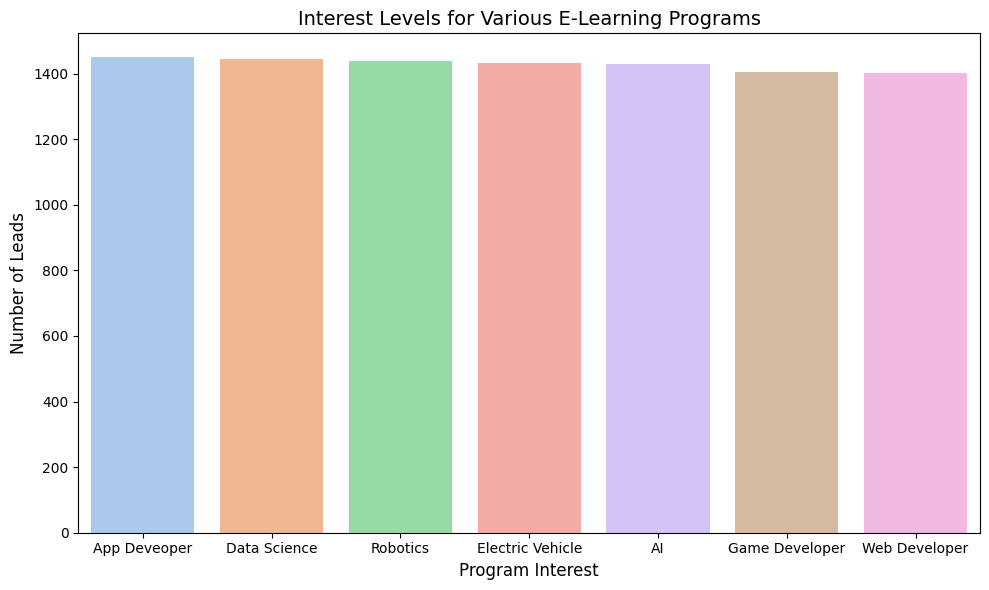

In [ ]:
total_program_interest = df['Program Interest'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_program_interest.index, y=total_program_interest.values, hue=total_program_interest.index, palette="pastel", legend=False)
plt.title("Interest Levels for Various E-Learning Programs", fontsize=14)
plt.xlabel("Program Interest", fontsize=12)
plt.ylabel("Number of Leads", fontsize=12)
plt.tight_layout()
plt.show()

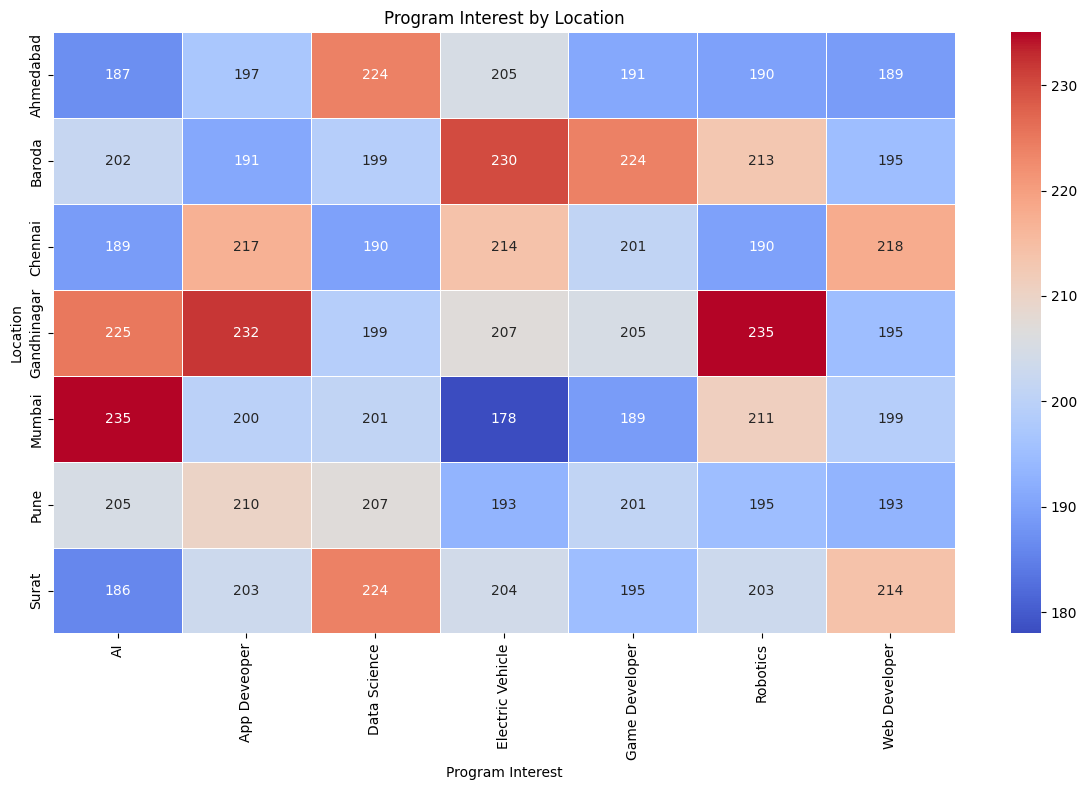

In [ ]:
# Example for heatmap
# Aggregating program interest data
program_interest_trends = df.groupby(['Program Interest', 'Location']).size().reset_index(name='Count')
heatmap_data = program_interest_trends.pivot_table(
    index='Location',
    columns='Program Interest',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)

plt.title('Program Interest by Location')
plt.xlabel('Program Interest')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


###4. Projections and Predictions:

  - Based on the generated data, make a data-driven projection about lead conversion rates and suggest a budget allocation strategy for marketing and targeting.


In [ ]:
df['Conversion Rate (%)'] = np.random.randint(10, 50, size=len(df))

avg_conversion = df.groupby('Program Interest')['Conversion Rate (%)'].mean()

total_leads = df['Program Interest'].value_counts()

budget_prportion = total_leads/total_leads.sum()

total_budget = 100000
suggested_budget = budget_prportion * total_budget

summary_df = pd.DataFrame({
    'Total Leads0': total_leads,
    'Average Convension (%)': avg_conversion,
    'Budget Proportion': budget_prportion,
    'Suggested Budget Allocation': suggested_budget
}).sort_values(by='Average Convension (%)', ascending=True)

print(summary_df)

                  Total Leads0  Average Convension (%)  Budget Proportion  \
Program Interest                                                            
App Deveoper              1450               29.119310             0.1450   
Web Developer             1403               29.340699             0.1403   
Robotics                  1437               29.459986             0.1437   
Game Developer            1406               29.798720             0.1406   
Data Science              1444               29.804709             0.1444   
AI                        1429               29.919524             0.1429   
Electric Vehicle          1431               29.978337             0.1431   

                  Suggested Budget Allocation  
Program Interest                               
App Deveoper                          14500.0  
Web Developer                         14030.0  
Robotics                              14370.0  
Game Developer                        14060.0  
Data Science      

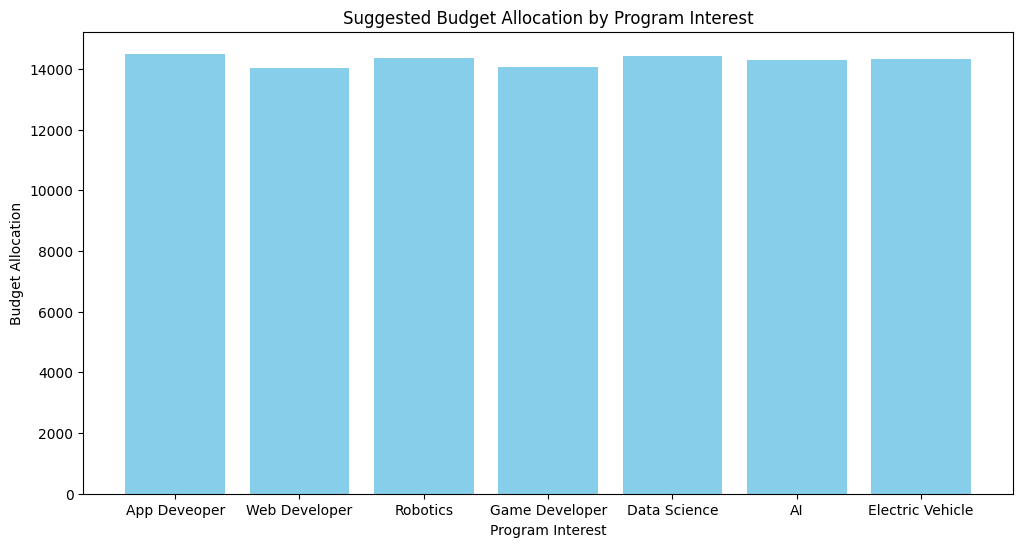

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(summary_df.index, summary_df['Suggested Budget Allocation'], color='skyblue')
plt.title('Suggested Budget Allocation by Program Interest')
plt.xlabel('Program Interest')
plt.ylabel('Budget Allocation')
plt.show()

###5. Data Preprocessing:

  - Document the steps taken to clean and preprocess the data for analysis

Inspect the dataset

In [ ]:
print('Data Overview:')
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Lead ID              10000 non-null  object
 1   Location             10000 non-null  object
 2   College              10000 non-null  object
 3   Year of Study        10000 non-null  object
 4   Program Interest     10000 non-null  object
 5   Lead Source          10000 non-null  object
 6   Conversion Rate (%)  10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None


Checking missing values

In [ ]:
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
Lead ID                0
Location               0
College                0
Year of Study          0
Program Interest       0
Lead Source            0
Conversion Rate (%)    0
dtype: int64


Checking duplicates value

In [ ]:
df.duplicated().sum()

0

Validate data

In [ ]:
print("Location:", df['Location'].unique())

Location: ['Pune' 'Mumbai' 'Chennai' 'Gandhinagar' 'Ahmedabad' 'Surat' 'Baroda']


In [ ]:
print("College:", df['College'].unique())

College: ['ABC University' 'XYZ University' 'GHI College' 'DEF Institute'
 'JKL Institute' 'LMN University' 'PQR University']


In [ ]:
print("Program Interest:", df['Program Interest'].unique())

Program Interest: ['App Deveoper' 'Data Science' 'Game Developer' 'AI' 'Web Developer'
 'Robotics' 'Electric Vehicle']


In [ ]:
print('Lead Source:', df['Lead Source'].unique())

Lead Source: ['Google Form' 'Instrageam' 'Whatsapp' 'LinkedIn' 'Collaboration'
 'Mss-Malling']


In [ ]:
df

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source,Conversion Rate (%)
0,LD1,Pune,ABC University,1st,App Deveoper,Google Form,34
1,LD2,Mumbai,ABC University,4th,Data Science,Instrageam,45
2,LD3,Chennai,XYZ University,3rd,Data Science,Instrageam,33
3,LD4,Gandhinagar,XYZ University,4th,Game Developer,Whatsapp,24
4,LD5,Gandhinagar,GHI College,3rd,Data Science,Instrageam,24
...,...,...,...,...,...,...,...
9995,LD9996,Chennai,PQR University,2nd,AI,Collaboration,46
9996,LD9997,Baroda,JKL Institute,2nd,App Deveoper,Instrageam,46
9997,LD9998,Ahmedabad,DEF Institute,3rd,Web Developer,Instrageam,37
9998,LD9999,Chennai,JKL Institute,1st,App Deveoper,Collaboration,36
